# Co-ordinate Descent

This project focuses on implementing co-ordinate descent for logistic regression for the [wine classification dataset](https://archive.ics.uci.edu/dataset/109/wine).

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import math
import matplotlib.pyplot as plt
import random

import warnings

warnings.filterwarnings("ignore")

### Data Loading and Transformation

In [2]:
!pip install ucimlrepo

Loading the data in a pandas dataframe

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

In [4]:
X.shape, y.shape

((178, 13), (178, 1))

There are 178 datapoints for a total of 3 classes. For our project we only need 2 classes.

In [5]:
X = X.iloc[:130]
y = y.iloc[:130]

In [6]:
np.unique(y)

array([1, 2])

In [7]:
X.shape, y.shape

((130, 13), (130, 1))

In [8]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,12.944077,1.968077,2.340462,18.785385,99.900000,2.522692,2.490000,0.330231,1.752385,4.194769,1.058892,2.954385,790.092308
std,0.888769,0.879968,0.297162,3.400459,15.381379,0.545393,0.737765,0.109087,0.539572,1.625782,0.168690,0.475166,352.513026
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,12.227500,1.510000,2.170000,16.525000,88.000000,2.147500,2.002500,0.260000,1.422500,2.862500,0.940000,2.732500,474.000000
50%,13.010000,1.730000,2.320000,18.550000,98.000000,2.560000,2.565000,0.300000,1.705000,3.870000,1.050000,2.980000,716.000000
75%,13.727500,2.057500,2.527500,20.950000,108.000000,2.937500,2.997500,0.397500,2.005000,5.375000,1.167500,3.300000,1063.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,8.900000,1.710000,4.000000,1680.000000


The features have a very huge difference in their values. We need to normalize them.

In [9]:
X=(X-X.mean())/X.std()

In [10]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02
mean,7.651999e-16,6.832142e-18,2.459571e-16,2.186285e-16,-3.825999e-16,-2.186285e-16,2.732857e-16,-3.552714e-16,-6.832142e-17,2.732857e-16,-5.773160e-16,8.745141e-16,-5.465713e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.153626e+00,-1.395592e+00,-3.299418e+00,-2.407141e+00,-1.943909e+00,-2.608562e+00,-2.602454e+00,-1.835517e+00,-2.487870e+00,-1.792841e+00,-2.186808e+00,-2.871384e+00,-1.452690e+00
25%,-8.062574e-01,-5.205607e-01,-5.736318e-01,-6.647294e-01,-7.736627e-01,-6.879297e-01,-6.607792e-01,-6.438059e-01,-6.113823e-01,-8.194635e-01,-7.047984e-01,-4.669621e-01,-8.966826e-01
50%,7.417343e-02,-2.705517e-01,-6.885653e-02,-6.922143e-02,-1.235260e-01,6.840511e-02,1.016583e-01,-2.771256e-01,-8.781893e-02,-1.997618e-01,-5.271396e-02,5.390826e-02,-2.101832e-01
75%,8.814694e-01,1.016208e-01,6.294160e-01,6.365657e-01,5.266108e-01,7.605661e-01,6.878881e-01,6.166574e-01,4.681776e-01,7.259464e-01,6.438308e-01,7.273568e-01,7.763052e-01
max,2.121949e+00,4.354615e+00,2.993447e+00,3.297972e+00,4.037349e+00,2.488677e+00,3.510601e+00,3.022996e+00,3.387159e+00,2.894134e+00,3.859793e+00,2.200525e+00,2.524468e+00


In [11]:
y = y - 1

### Utility Functions

In [12]:
def plot_single_loss(x, title="", xlabel="", ylabel="", label=""):
  plt.plot(x, label=label)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

def plot_gd_v_cd(x1, x2, title="", xlabel="", ylabel="", label=""):
  plt.plot(x1, label=label)
  plt.plot(x2, label="Gradient Descent")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

def plot_two_losses(x1, x2, title="", xlabel="", ylabel="", label1="", label2="", xlim=False, ylim=False):
  plt.plot(x1, label=label1)
  plt.plot(x2, label=label2)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if xlim:
    plt.xlim(xlim[0], xlim[1])
  if ylim:
    plt.ylim(ylim[0], ylim[1])
  plt.legend()
  plt.show()

def plot_three_losses(x1, x2, x3, title="", xlabel="", ylabel="", label1="", label3=""):
  plt.plot(x1, label=label1)
  plt.plot(x2, label="Gradient Descent")
  plt.plot(x3, label=label3)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

def plot_sparse_cd(x1, x2, x3, x4, x5, title="", xlabel="", ylabel="", label1="", label2="", label3="", label4="", label5=""):
  plt.plot(x1, label=label1)
  plt.plot(x2, label=label2)
  plt.plot(x3, label=label3)
  plt.plot(x4, label=label4)
  plt.plot(x5, label=label5)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

def plot_loss_bars(k_values, loss_values, title="", xlabel="", ylabel=""):
  plt.bar(k_values, loss_values)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

### Gradient Descent

We use a simple logistic regression from sklearn without regularization and note the final loss. We only need to compare the training losses of the gradient descent and co-ordinate descent. Hence, we use the whole dataset for training. (No need for train-test split)

In [13]:
def TrainLogisticRegression(x, y):
  lr = LogisticRegression(penalty=None)
  lr.fit(x, y)

  return lr

In [14]:
lr = TrainLogisticRegression(X, y)
lr_loss = log_loss(y, lr.predict(X))
lr_loss

2.2204460492503136e-16

### Co-ordinate Descent

In [15]:
class CoordinateDescentLR():
  def __init__(self):
    self.losses = []

  def fit(self, x, y, epochs=1000, theta=0.2):
    x = x.to_numpy()
    y = y.to_numpy()

    x = self.add_intercept(x)

    self.weights = np.random.rand(x.shape[1])
    self.theta = theta

    for epoch in range(epochs):
      pred = np.dot(x, self.weights)
      pred = self.sigmoid(pred)
      loss = log_loss(y, pred)
      i = self.get_coordinate(x, y)
      self.update_parameters(x, i)
      # print(f"Epoch {epoch} => Loss={loss}")

      self.losses.append(loss)

  def add_intercept(self, x):
    intercept = np.ones((x.shape[0], 1))
    return np.concatenate((intercept, x), axis=1)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def get_coordinate(self, x, y):
    min_loss = 10000
    min_i = 0
    for i in range(self.weights.shape[0]):
      i_vector = np.zeros(self.weights.shape)
      i_vector[i] = self.theta
      l1 = log_loss(y, self.sigmoid(np.dot(x, self.weights + i_vector)))
      l2 = log_loss(y, self.sigmoid(np.dot(x, self.weights - i_vector)))
      if l1 <= l2 and l1 < min_loss:
        min_loss = l1
        min_i = i
      elif l2 <= l1 and l2 < min_loss:
        min_loss = l2
        min_i = i

    return min_i

  def update_parameters(self, x, i):
    i_vector = np.zeros(self.weights.shape)
    i_vector[i] = self.theta
    l1 = log_loss(y, self.sigmoid(np.dot(x, self.weights + i_vector)))
    l2 = log_loss(y, self.sigmoid(np.dot(x, self.weights - i_vector)))
    if l1 <= l2:
      self.weights += i_vector
    else:
      self.weights -= i_vector

In [16]:
cdlr = CoordinateDescentLR()
cdlr.fit(X,y)
cdlr.losses[-1]

2.579133487975365e-16

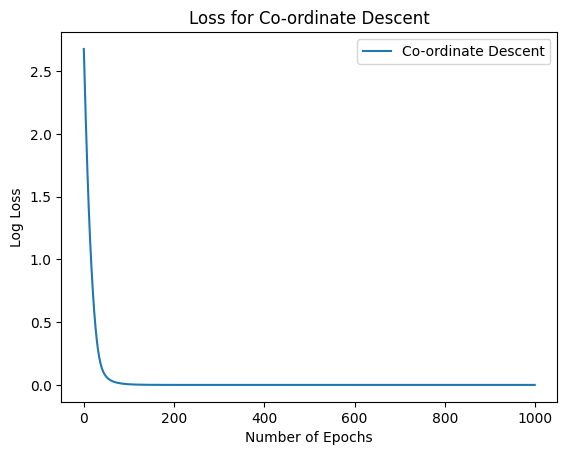

In [17]:
plot_single_loss(cdlr.losses, "Loss for Co-ordinate Descent", "Number of Epochs", "Log Loss", "Co-ordinate Descent")

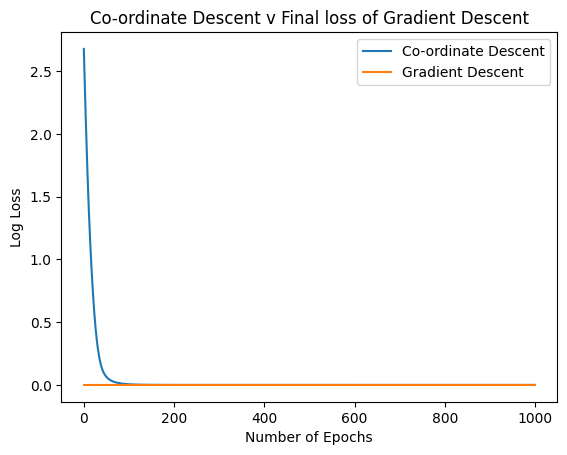

In [18]:
plot_gd_v_cd(cdlr.losses, [lr_loss]*1000, "Co-ordinate Descent v Final loss of Gradient Descent", "Number of Epochs", "Log Loss", "Co-ordinate Descent")

### Random Feature Co-ordinate Descent

In [19]:
class RandomCoordinateDescentLR():
  def __init__(self):
    self.losses = []

  def fit(self, x, y, epochs=1000, theta=0.2):
    x = x.to_numpy()
    y = y.to_numpy()

    x = self.add_intercept(x)

    self.weights = np.random.rand(x.shape[1])
    self.theta = theta

    for epoch in range(epochs):
      pred = np.dot(x, self.weights)
      pred = self.sigmoid(pred)
      loss = log_loss(y, pred)
      i = self.get_coordinate(x, y)
      self.update_parameters(x, i)
      # print(f"Epoch {epoch} => Loss={loss}")

      self.losses.append(loss)

  def add_intercept(self, x):
    intercept = np.ones((x.shape[0], 1))
    return np.concatenate((intercept, x), axis=1)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def get_coordinate(self, x, y):
    return random.randint(0, self.weights.shape[0]-1)

  def update_parameters(self, x, i):
    i_vector = np.zeros(self.weights.shape)
    i_vector[i] = self.theta
    l1 = log_loss(y, self.sigmoid((np.dot(x, self.weights + i_vector))))
    l2 = log_loss(y, self.sigmoid((np.dot(x, self.weights - i_vector))))
    if l1 <= l2:
      self.weights += i_vector
    else:
      self.weights -= i_vector

In [20]:
cdlr2 = RandomCoordinateDescentLR()
cdlr2.fit(X,y)
cdlr2.losses[-1]

7.71792112209636e-07

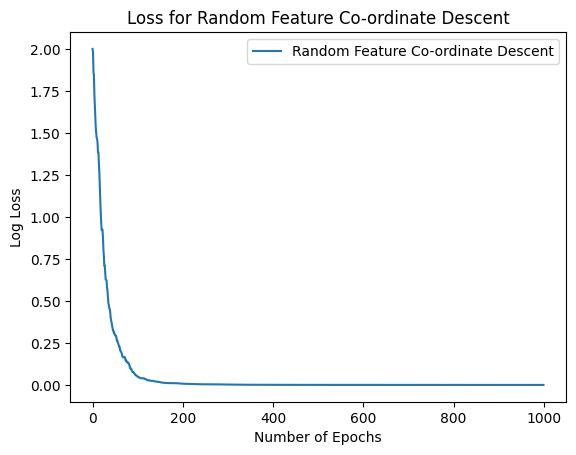

In [21]:
plot_single_loss(cdlr2.losses, "Loss for Random Feature Co-ordinate Descent", "Number of Epochs", "Log Loss", "Random Feature Co-ordinate Descent")

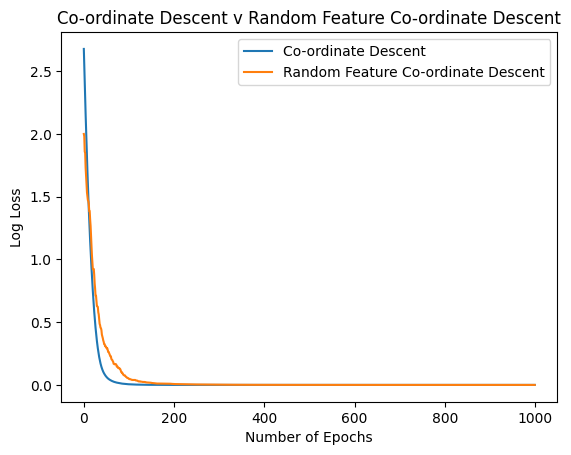

In [22]:
plot_two_losses(cdlr.losses, cdlr2.losses, "Co-ordinate Descent v Random Feature Co-ordinate Descent", "Number of Epochs", "Log Loss", "Co-ordinate Descent", "Random Feature Co-ordinate Descent")

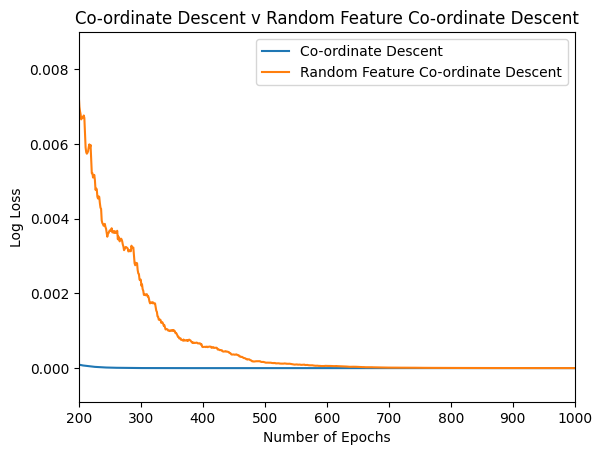

In [23]:
plot_two_losses(cdlr.losses, cdlr2.losses, "Co-ordinate Descent v Random Feature Co-ordinate Descent", "Number of Epochs", "Log Loss", "Co-ordinate Descent", "Random Feature Co-ordinate Descent", [200,1000], [-0.0009,0.009])

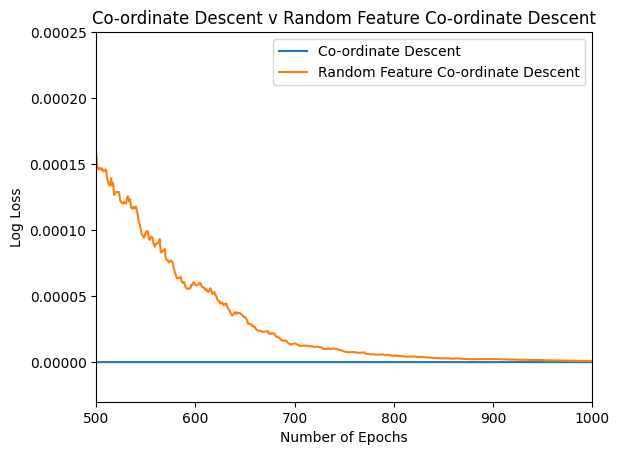

In [24]:
plot_two_losses(cdlr.losses, cdlr2.losses, "Co-ordinate Descent v Random Feature Co-ordinate Descent", "Number of Epochs", "Log Loss", "Co-ordinate Descent", "Random Feature Co-ordinate Descent", [500,1000], [-0.00003,0.00025])

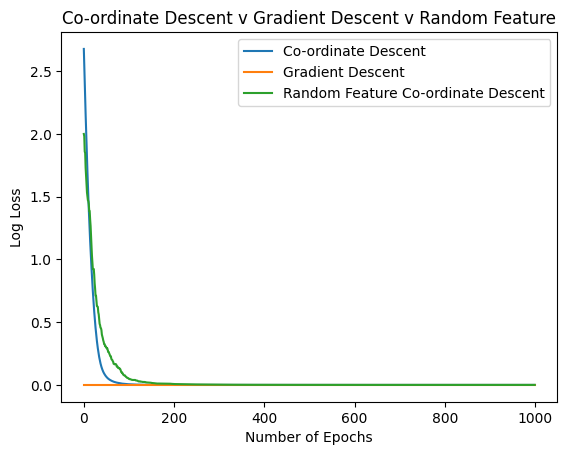

In [25]:
plot_three_losses(cdlr.losses, [lr_loss]*1000, cdlr2.losses, "Co-ordinate Descent v Gradient Descent v Random Feature", "Number of Epochs", "Log Loss", "Co-ordinate Descent", "Random Feature Co-ordinate Descent")

### Co-ordinate Descent based on Gradients

In [26]:
class CDLR3():
  def __init__(self):
    self.losses = []

  def fit(self, x, y, epochs=2000):
    x = x.to_numpy()
    y = y.to_numpy()

    x = self.add_intercept(x)

    self.weights = np.random.rand(x.shape[1])

    for epoch in range(epochs):
      pred = np.dot(x, self.weights)
      pred = self.sigmoid(pred)
      # print(pred)
      loss = log_loss(y, pred)
      i = self.get_coordinate(x, y, pred)
      dw = self.compute_gradient(x[:,i], y, pred)
      # print(f"Epoch {epoch} => Loss={loss}")
      self.update_parameter(dw, i)
      self.losses.append(loss)

  def add_intercept(self, x):
    intercept = np.ones((x.shape[0], 1))
    return np.concatenate((intercept, x), axis=1)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def get_coordinate(self, x, y, pred):
    grads = self.compute_gradient(x, y, pred)
    grads = abs(grads)
    # print(grads, np.argmax(grads))

    return np.argmax(grads)

  def compute_gradient(self, x, y, pred):
    dw = np.dot(x.T, (pred - y))
    dw = np.mean(dw.T, axis=0)
    # print(dw)
    return dw

  def update_parameter(self, dw, i):
    self.weights[i] -= 0.0001 * dw
    # print(self.weights)

In [27]:
cdlr3 = CDLR3()
cdlr3.fit(X,y)

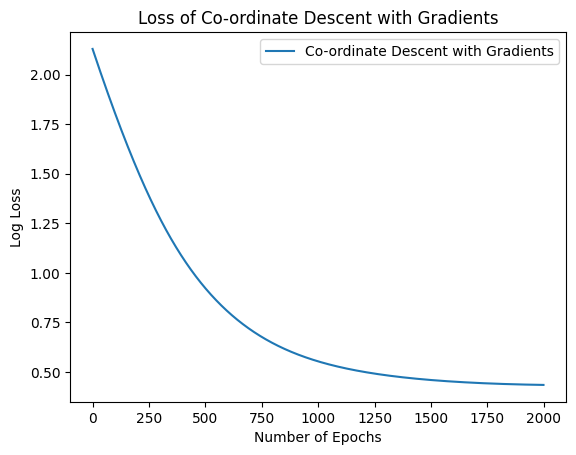

In [28]:
plot_single_loss(cdlr3.losses, "Loss of Co-ordinate Descent with Gradients", "Number of Epochs", "Log Loss", "Co-ordinate Descent with Gradients")

### Sparse Co-ordinate Descent

In [37]:
class SparseCoordinateDescent():
  def __init__(self, k):
    self.losses = []
    self.k = k

  def fit(self, x, y, epochs=1000, theta=0.2):
    x = x.to_numpy()
    y = y.to_numpy()

    x = self.add_intercept(x)

    self.weights = np.random.rand(x.shape[1])
    self.indices = np.random.choice(x.shape[1], x.shape[1] - self.k, replace=False)
    self.weights[self.indices] = 0
    # print(self.weights)
    self.theta = theta

    for epoch in range(epochs):
      pred = np.dot(x, self.weights)
      pred = self.sigmoid(pred)
      loss = log_loss(y, pred)
      i = self.get_coordinate(x, y)
      self.update_parameters(x, i)
      # print(f"Epoch {epoch} => Loss={loss}")

      self.losses.append(loss)

  def add_intercept(self, x):
    intercept = np.ones((x.shape[0], 1))
    return np.concatenate((intercept, x), axis=1)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def get_coordinate(self, x, y):
    min_loss = 10000
    min_i = 0
    for i in range(self.weights.shape[0]):
      if i in self.indices:
        continue
      i_vector = np.zeros(self.weights.shape)
      i_vector[i] = self.theta
      l1 = log_loss(y, self.sigmoid(np.dot(x, self.weights + i_vector)))
      l2 = log_loss(y, self.sigmoid(np.dot(x, self.weights - i_vector)))
      if l1 <= l2 and l1 < min_loss:
        min_loss = l1
        min_i = i
      elif l2 <= l1 and l2 < min_loss:
        min_loss = l2
        min_i = i

    return min_i

  def update_parameters(self, x, i):
    i_vector = np.zeros(self.weights.shape)
    i_vector[i] = self.theta
    l1 = log_loss(y, self.sigmoid(np.dot(x, self.weights + i_vector)))
    l2 = log_loss(y, self.sigmoid(np.dot(x, self.weights - i_vector)))
    if l1 <= l2:
      self.weights += i_vector
    else:
      self.weights -= i_vector

In [38]:
scd3 = SparseCoordinateDescent(3)
scd3.fit(X, y)
scd3.weights, scd3.losses[-1]

(array([ 0.        ,  0.        ,  0.        , -0.61945131,  0.        ,
         0.        , -1.40590667,  0.        ,  0.        ,  0.        ,
         0.        , -0.04073362,  0.        ,  0.        ]),
 0.4969837892441116)

In [39]:
scd5 = SparseCoordinateDescent(5)
scd5.fit(X, y)
scd5.weights, scd5.losses[-1]

(array([ 0.75618168, -4.93157756,  0.        ,  0.        ,  1.17045885,
         0.        ,  0.        ,  0.        , -0.01344098, -0.90908062,
         0.        ,  0.        ,  0.        ,  0.        ]),
 0.15517821894440822)

In [40]:
scd7 = SparseCoordinateDescent(7)
scd7.fit(X, y)
scd7.weights, scd7.losses[-1]

(array([ -5.188404  , -68.82633652,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        , -16.09354126,
          0.        ,   0.        , -20.31034175,  30.12217456,
         -2.47626561, -54.34232226]),
 0.0001561118102917133)

In [41]:
scd9 = SparseCoordinateDescent(9)
scd9.fit(X, y)
scd9.weights, scd9.losses[-1]

(array([  1.46407244, -13.71697178,   0.        ,  -6.61786168,
          8.68914609,   0.15328962,   2.87596029,   0.        ,
          0.        ,  -3.28537339,  -3.15077677,   1.86280946,
          0.        ,   0.        ]),
 0.024808701286966665)

In [42]:
scd11 = SparseCoordinateDescent(11)
scd11.fit(X, y)
scd11.weights, scd11.losses[-1]

(array([-1.72042160e-02, -4.85619676e+01,  0.00000000e+00, -2.12614129e+01,
         2.27788410e+01,  0.00000000e+00,  5.74664624e+00, -2.03795677e+01,
         2.94050859e+00, -1.89533096e+00,  0.00000000e+00,  1.61754233e+01,
        -1.00454755e+01, -4.89764354e+01]),
 7.93382453751365e-16)

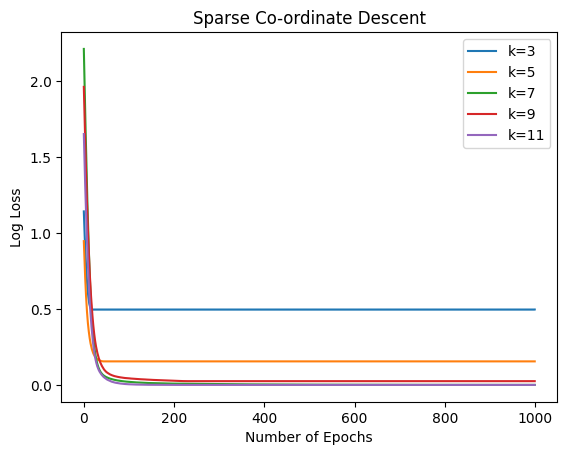

In [43]:
plot_sparse_cd(scd3.losses, scd5.losses, scd7.losses, scd9.losses, scd11.losses, "Sparse Co-ordinate Descent", "Number of Epochs", "Log Loss", "k=3", "k=5", "k=7", "k=9", "k=11")

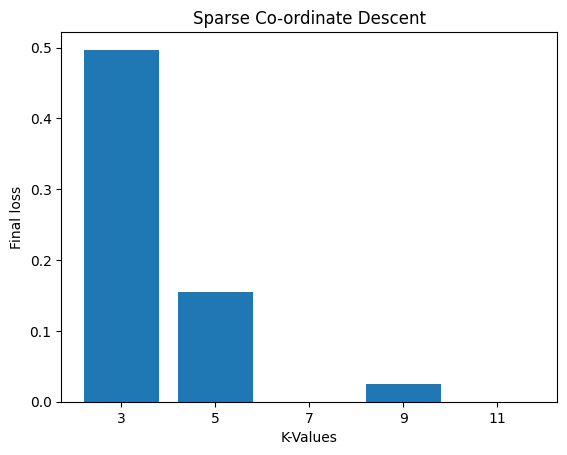

In [44]:
k_values = ["3", "5", "7", "9", "11"]
loss_values = [scd3.losses[-1], scd5.losses[-1], scd7.losses[-1], scd9.losses[-1], scd11.losses[-1]]
plot_loss_bars(k_values, loss_values, "Sparse Co-ordinate Descent", "K-Values", "Final loss")